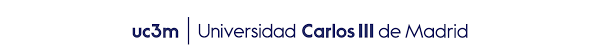

Práctica 2 - Grupo 23


Alejandro Blanco Fernández

# Introducción


En este Notebook se encuentra nuestra resolución de la Práctica 2 de Aprendizaje Automático, que consiste en la predicción de abandono de los empleados en una empresa y que se modeliza a través de un problema de clasificación. En este tipo de problemas se asigna una etiqueta o categoría a un conjunto de datos basándose en ciertas características o atributos. Es decir, se trata de un proceso de predicción que utiliza un modelo entrenado para clasificar nuevas observaciones en una o varias categorías previamente definidas. En nuestro caso, van a ser dos categorías en que clasificamos: Sí y No, que establecen si los empleados han sufrido *burnout* o no, respectivamente.


# Inicio

En primer lugar, montamos Google Drive y Google Colab para poder trabajar conjuntamente. Luego, hacemos los imports necesarios para el desarrollo del código, cargamos el fichero de datos y realizamos nuestro Análisis Exploratorio de los Datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/MLuc3m/Practica2-Grupo23/")

## Imports

In [ ]:
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold

# Semilla
np.random.seed(23)

In [ ]:
# Cargamos el fichero
attr_df = pickle.load(open('attrition_available_23.pkl', 'rb'))

# Y lo imprimimos entero
pd.set_option('display.max_columns', None)
attr_df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,7.315971,NaN,NaN,4.0,3.0,NaN,4.0,31.0,Yes,Travel_Frequently,Research & Development,10.0,NaN,Life Sciences,1.0,2.0,Female,1.0,Research Scientist,Single,NaN,NaN,NaN,23.0,8.0,1.0,6.0,3.0,5.0,NaN,4.0
6,6.450877,17.0,3.0,4.0,1.0,3.0,1.0,28.0,Yes,Travel_Rarely,NaN,11.0,2.0,Medical,NaN,7.0,Male,2.0,Sales Executive,Single,58130.0,2.0,Y,20.0,8.0,1.0,5.0,2.0,0.0,NaN,NaN
13,NaN,NaN,2.0,3.0,1.0,2.0,2.0,47.0,Yes,Non-Travel,Research & Development,1.0,1.0,Medical,NaN,14.0,Male,1.0,NaN,Married,57620.0,NaN,Y,11.0,NaN,2.0,NaN,4.0,10.0,9.0,9.0
28,NaN,6.0,2.0,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently,Research & Development,1.0,2.0,Medical,NaN,29.0,Male,NaN,NaN,Divorced,103330.0,3.0,Y,14.0,8.0,1.0,NaN,2.0,1.0,0.0,0.0
30,9.662808,11.0,2.0,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely,Research & Development,4.0,3.0,Medical,1.0,31.0,Male,3.0,Research Scientist,Divorced,68540.0,NaN,Y,11.0,8.0,0.0,5.0,5.0,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,6.0,3.0,3.0,4.0,1.0,3.0,42.0,No,Travel_Rarely,Research & Development,5.0,NaN,Medical,1.0,4406.0,NaN,1.0,NaN,Single,NaN,3.0,Y,17.0,8.0,1.0,10.0,5.0,3.0,0.0,2.0
4406,5.897197,8.0,2.0,NaN,4.0,NaN,3.0,NaN,No,Travel_Rarely,Research & Development,2.0,NaN,Medical,NaN,4407.0,Male,1.0,Laboratory Technician,Divorced,NaN,2.0,Y,15.0,8.0,0.0,10.0,2.0,NaN,0.0,2.0
4407,7.149526,18.0,3.0,NaN,1.0,3.0,3.0,25.0,No,Travel_Rarely,Research & Development,25.0,2.0,Life Sciences,1.0,NaN,Male,NaN,Sales Executive,Married,37020.0,0.0,Y,20.0,8.0,0.0,5.0,4.0,NaN,1.0,2.0
4408,9.187612,NaN,2.0,NaN,NaN,1.0,3.0,NaN,No,Travel_Rarely,NaN,NaN,2.0,Medical,1.0,4409.0,Male,1.0,Laboratory Technician,Divorced,NaN,0.0,Y,14.0,NaN,1.0,NaN,2.0,9.0,7.0,8.0


## Análisis Exploratorio de Datos (EDA)

El EDA es un proceso que se utiliza para analizar y comprender los datos. Se usan técnicas y herramientas para explorar  los patrones, la distribución, la estructura y las relaciones entre las variables del conjunto de datos, con el objetivo de obtener información relevante y detectar anomalías. A continuación vamos a realizar un EDA simplificado que nos va a permitir hacernos una idea de nuestros datos antes de pasar a la implementación del código.

In [ ]:
# Instancias y atributos del conjunto de datos

print('Tamaño de los datos es: ', attr_df.shape)
print('---------------------------------')
print('Número de instancias: ', len(attr_df.index))
print('---------------------------------')
print('Número de atributos: ', len(attr_df.columns))
print('---------------------------------')
print('Tipos de los atributos: \n', attr_df.dtypes.value_counts())
print('---------------------------------')
print('Tipo de cada atributo: \n', attr_df.dtypes)
print('---------------------------------')

Tamaño de los datos es:  (4410, 31)
---------------------------------
Número de instancias:  4410
---------------------------------
Número de atributos:  31
---------------------------------
Tipos de los atributos: 
 float64    23
object      8
dtype: int64
---------------------------------
Tipo de cada atributo: 
 hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus     

In [ ]:
# Columnas constantes/innecesarias
# Comprobamos si las columnas tienen valores constantes con el método .nunique()
for col in attr_df.columns:
    if attr_df[col].nunique() == 1:
      print(col) # Se imprimen los atributos que siempre tienen el mismo valor


EmployeeCount
Over18
StandardHours


In [ ]:
# Contador de valores nulos por atributo
attr_df.isnull().sum()

hrs                        945
absences                   919
JobInvolvement             897
PerformanceRating          766
EnvironmentSatisfaction    764
JobSatisfaction            816
WorkLifeBalance             38
Age                        964
Attrition                    0
BusinessTravel               0
Department                 710
DistanceFromHome           929
Education                  713
EducationField             876
EmployeeCount              868
EmployeeID                 956
Gender                     745
JobLevel                   771
JobRole                    807
MaritalStatus                0
MonthlyIncome              868
NumCompaniesWorked         753
Over18                     713
PercentSalaryHike          753
StandardHours              849
StockOptionLevel           962
TotalWorkingYears          885
TrainingTimesLastYear      729
YearsAtCompany             876
YearsSinceLastPromotion    900
YearsWithCurrManager       852
dtype: int64

In [ ]:
# Y la proporción de Missing values por atributo
missing_prop = attr_df.isna().sum() / len(attr_df)
print("Proporción de Missing values por atributo: \n", missing_prop)
# En .isna(), True = 1 y False = 0

Proporción de Missing values por atributo: 
 hrs                        0.214286
absences                   0.208390
JobInvolvement             0.203401
PerformanceRating          0.173696
EnvironmentSatisfaction    0.173243
JobSatisfaction            0.185034
WorkLifeBalance            0.008617
Age                        0.218594
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.160998
DistanceFromHome           0.210658
Education                  0.161678
EducationField             0.198639
EmployeeCount              0.196825
EmployeeID                 0.216780
Gender                     0.168934
JobLevel                   0.174830
JobRole                    0.182993
MaritalStatus              0.000000
MonthlyIncome              0.196825
NumCompaniesWorked         0.170748
Over18                     0.161678
PercentSalaryHike          0.170748
StandardHours              0.192517
StockOptionLevel           0.218141
TotalWorkingYears  

In [ ]:
# Declaración de variables X e y
y = attr_df['Attrition']

X = attr_df.drop('Attrition',axis=1)

# ¿Problema desbalanceado?
y.value_counts() # Sí está desbalanceado, la mayoría de instancias pertenece a la clase No

No     3699
Yes     711
Name: Attrition, dtype: int64

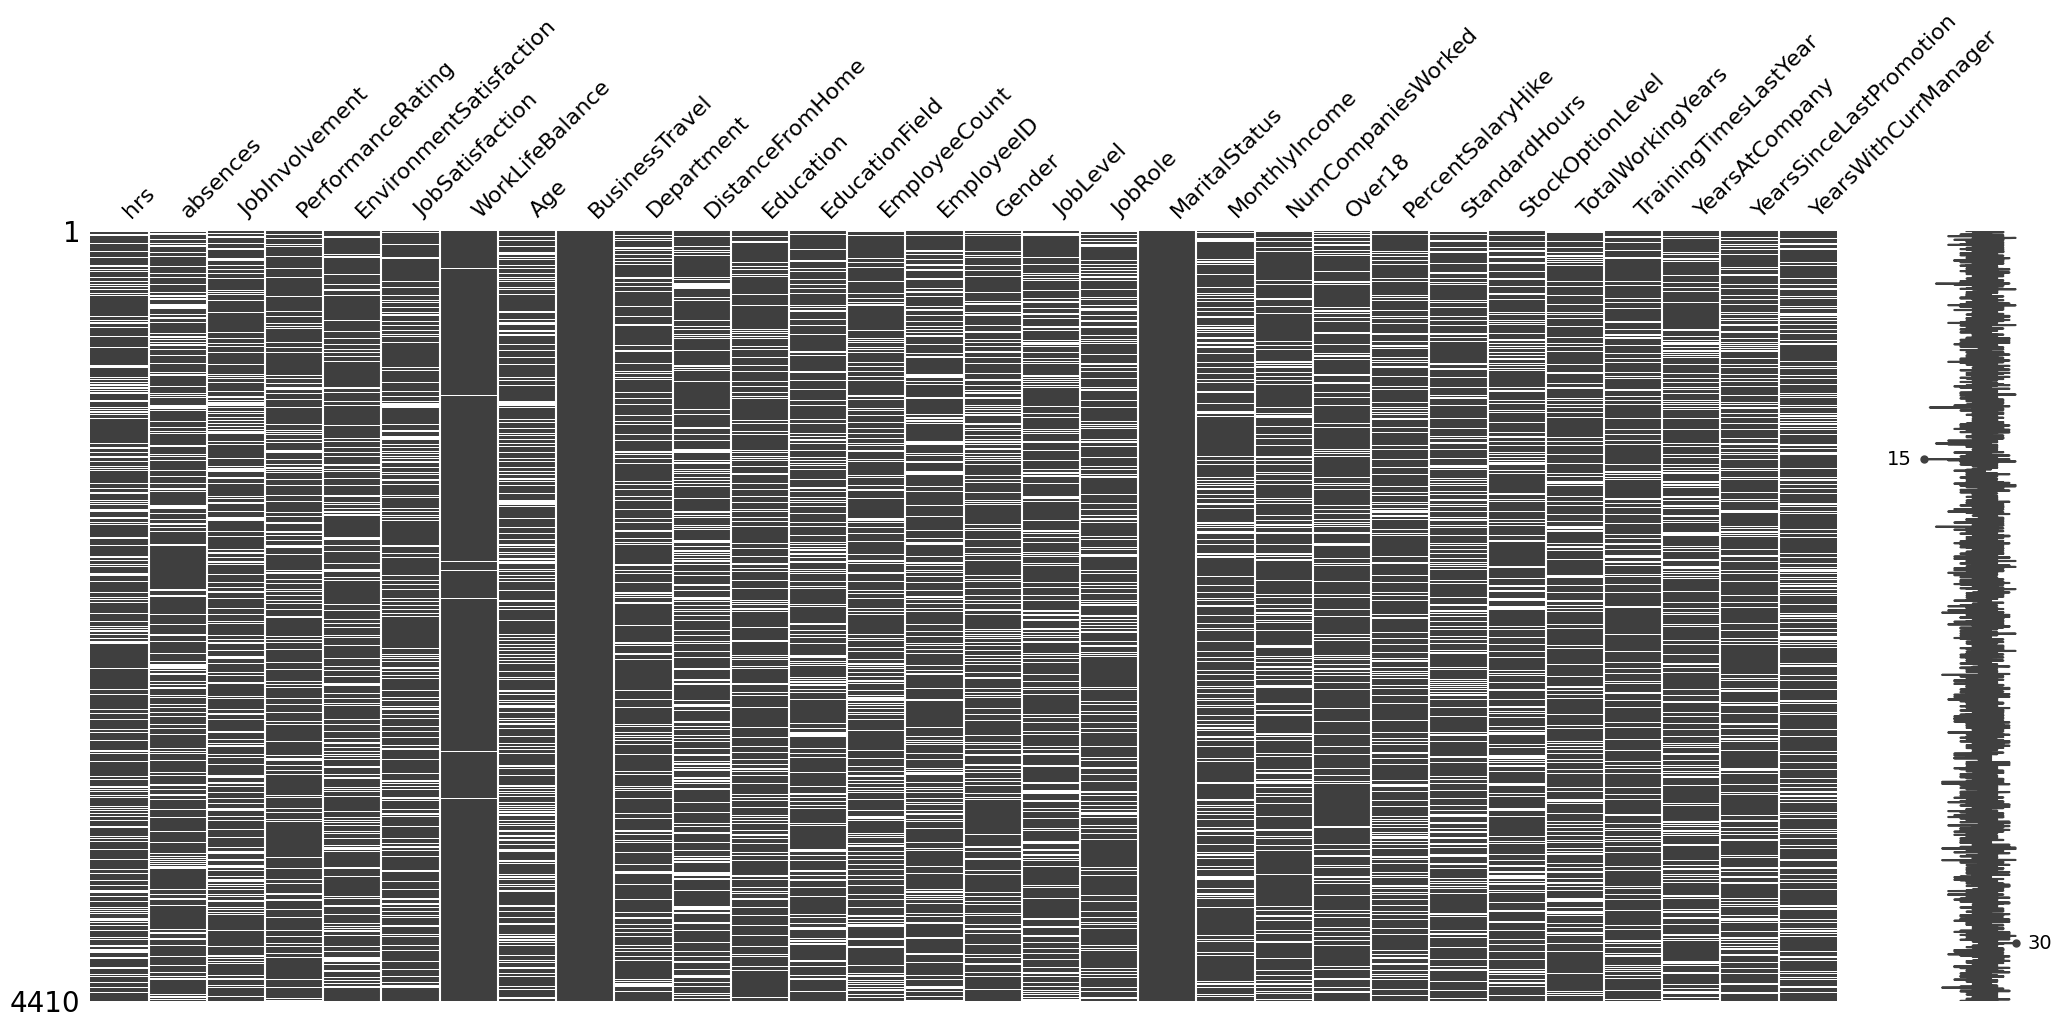

In [ ]:
# Representación gráfica de los valores nulos
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(X)
plt.show()

Text(0.5, 1.0, 'Correlación entre variables')

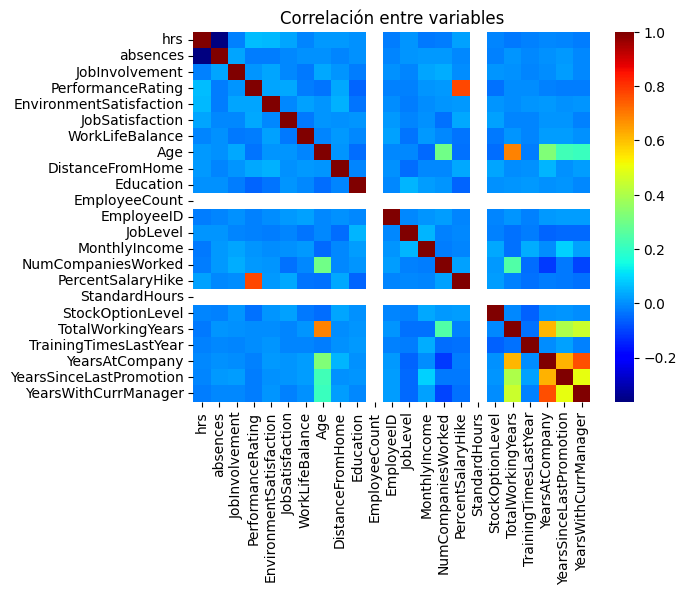

In [ ]:
# Añadimos un Heatmap para ver las correlaciones entre variables
corr = attr_df.corr()
sns.heatmap(corr, cmap='jet') # annot= True
plt.xticks(rotation=90)
plt.title('Correlación entre variables')

In [ ]:
# Otra información importante de los datos

# Primeras filas del conjunto de datos
print('Primeras filas de los datos')
print(attr_df.head())

print('---------------------------------')
# Estadísticas descriptivas de las variables
print('Estadísticas descriptivas de las variables:')
print(attr_df.describe()) # Pero esto es solo de variables numéricas

print('---------------------------------')
# Aislando la variable objetivo
print('Estadísticas descriptivas de la variable objetivo:')
print(attr_df['Attrition'].describe())

Primeras filas de los datos
         hrs  absences  JobInvolvement  PerformanceRating  \
1   7.315971       NaN             NaN                4.0   
6   6.450877      17.0             3.0                4.0   
13       NaN       NaN             2.0                3.0   
28       NaN       6.0             2.0                3.0   
30  9.662808      11.0             2.0                3.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age Attrition  \
1                       3.0              NaN              4.0  31.0       Yes   
6                       1.0              3.0              1.0  28.0       Yes   
13                      1.0              2.0              2.0  47.0       Yes   
28                      4.0              3.0              1.0  44.0       Yes   
30                      1.0              2.0              3.0  26.0       Yes   

       BusinessTravel              Department  DistanceFromHome  Education  \
1   Travel_Frequently  Research & Develo

In [ ]:
# Eliminamos las variables constantes o innecesarias (también incluimos EmployeeID pese a no ser constante)
X.drop(['EmployeeCount','Over18','StandardHours','EmployeeID'], axis=1, inplace=True)
# El parámetro inplace=True establece los cambios en el dataframe original, y no hay necesidad de hacer nuevas declaraciones
pd.set_option('display.max_columns', None)
attr_df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,7.315971,NaN,NaN,4.0,3.0,NaN,4.0,31.0,Yes,Travel_Frequently,Research & Development,10.0,NaN,Life Sciences,1.0,2.0,Female,1.0,Research Scientist,Single,NaN,NaN,NaN,23.0,8.0,1.0,6.0,3.0,5.0,NaN,4.0
6,6.450877,17.0,3.0,4.0,1.0,3.0,1.0,28.0,Yes,Travel_Rarely,NaN,11.0,2.0,Medical,NaN,7.0,Male,2.0,Sales Executive,Single,58130.0,2.0,Y,20.0,8.0,1.0,5.0,2.0,0.0,NaN,NaN
13,NaN,NaN,2.0,3.0,1.0,2.0,2.0,47.0,Yes,Non-Travel,Research & Development,1.0,1.0,Medical,NaN,14.0,Male,1.0,NaN,Married,57620.0,NaN,Y,11.0,NaN,2.0,NaN,4.0,10.0,9.0,9.0
28,NaN,6.0,2.0,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently,Research & Development,1.0,2.0,Medical,NaN,29.0,Male,NaN,NaN,Divorced,103330.0,3.0,Y,14.0,8.0,1.0,NaN,2.0,1.0,0.0,0.0
30,9.662808,11.0,2.0,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely,Research & Development,4.0,3.0,Medical,1.0,31.0,Male,3.0,Research Scientist,Divorced,68540.0,NaN,Y,11.0,8.0,0.0,5.0,5.0,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,6.0,3.0,3.0,4.0,1.0,3.0,42.0,No,Travel_Rarely,Research & Development,5.0,NaN,Medical,1.0,4406.0,NaN,1.0,NaN,Single,NaN,3.0,Y,17.0,8.0,1.0,10.0,5.0,3.0,0.0,2.0
4406,5.897197,8.0,2.0,NaN,4.0,NaN,3.0,NaN,No,Travel_Rarely,Research & Development,2.0,NaN,Medical,NaN,4407.0,Male,1.0,Laboratory Technician,Divorced,NaN,2.0,Y,15.0,8.0,0.0,10.0,2.0,NaN,0.0,2.0
4407,7.149526,18.0,3.0,NaN,1.0,3.0,3.0,25.0,No,Travel_Rarely,Research & Development,25.0,2.0,Life Sciences,1.0,NaN,Male,NaN,Sales Executive,Married,37020.0,0.0,Y,20.0,8.0,0.0,5.0,4.0,NaN,1.0,2.0
4408,9.187612,NaN,2.0,NaN,NaN,1.0,3.0,NaN,No,Travel_Rarely,NaN,NaN,2.0,Medical,1.0,4409.0,Male,1.0,Laboratory Technician,Divorced,NaN,0.0,Y,14.0,NaN,1.0,NaN,2.0,9.0,7.0,8.0


## Comentarios EDA

A partir del análisis anterior, podemos concluir los siguientes puntos:

- Conjunto de datos pequeño. Esto puede afectar de algunas formas al programa: *overfitting*, ya que puede que se ajuste demasiado a los datos de entrenamiento; *underfitting*, porque los modelos no puedan aprender suficiente del conjunto de datos; y no encontrar patrones entre las variables porque, al ser un conjunto pequeño, no sería capaz de identificar las posibles relaciones significativas entre variables.

- Los tipos de variables son float64 y object. Las variables float64 son más fáciles de manejar en el análisis del problema, ya que se pueden utilizar técnicas de preprocesamiento, como normalización y estandarización, para asegurar que todas las variables estén en la misma escala. Las variables object, en cambio, son variables categóricas que pueden tener distintos tipos de datos, desde cadenas de caracteres hasta fechas o categorías. Requieren una transformación adicional antes de poder ser utilizadas, por ejemplo, con transformadores como One-Hot-Encoder, Label Encoder y Ordinal Encoder.

- Hay atributos constantes. Las variables *EmployeeCount*, *Over18* y *StandardHours* tienen valores constantes, es decir, siempre tienen el mismo valor para todas las filas. Para el problema que nos ocupa, no creemos que aporte gran información el número de empleados, si son mayores de edad (de hecho, la edad promedio es de 36 años, que se puede ver en las estadísticas descriptivas de la variable *Age*) y el número de horas promedio que los trabajadores hacen. Aparte de estas tres variables, también hemos eliminado *EmployeeID* que, aunque no tenga un valor constante, no consideramos que haya ningún impacto en el *burnout* de los empleados.

  En realidad, el análisis previo no es del todo correcto, porque las tres variables son constantes sólo en aquellos valores que no son nulos, en otras palabras, tienen valores faltantes y no faltantes, y es en estos últimos donde siempre tienen el mismo valor. Hemos tomado la decisión de quitar estos atributos pese a que, técnicamente hablando, no tienen el mismo valor (a veces hay un número y a veces NaN). Es una decisión importante que queremos dejar claro desde un inicio porque la imputación de atributos en un caso como este debe estudiarse con cuidado y de forma razonada.

- Hay una considerable cantidad (en torno al 20%) de valores faltantes por atributo (en la gran mayoría). No obstante, vamos a mantener la mayoría de las variables y tratar de remediar estos valores nulos a través del preprocesamiento de datos.

- Es un problema desbalanceado. La mayoría de las instancias se encuentran en la clase "No", en torno al 84%, mientras que el resto pertenecen a la clase "Sí" (16%). El desbalanceo de clases puede producir un sesgo en el modelo porque, al haber una clase mayoritaria, el modelo tiende a clasificar la mayoría de las muestras en esa clase, en vez de tener un equilibrio entre ambas clases. También causa un bajo rendimiento de la clase minoritaria, dado que sería incapaz de aprender los patrones de esa clase, y, en general, una mayor dificultad para evaluar el modelo. El hecho de que la clase mayoritaria esté bien clasificada puede dar lugar a una alta tasa de precisión global del modelo, pero puede ser engañoso y no representativo de la capacidad del modelo para clasificar correctamente la clase minoritaria.

- No hay gran correlación entre variables. En nuestro contexto, puede ser que esta independencia entre variables sea beneficiosa. El impacto puede ser que mejore la interpretación del modelo ya que, cuando hay variables correladas, es difícil saber qué variable es la que está influyendo más al resultado final. Esta correlación entre variables, además, puede ser resultar en un problema de multicolinealidad, donde se obtendrían variables redundate y, en consecuencia, un peor desempeño del modelo.

# Comentarios importantes

Algunos comentarios generales acerca de nuestras decisiones de implementación son:

- Usamos tres técnicas para corregir el desbalanceo: en la división de los conjuntos de entrenamiento y test con el parámetro *stratify*; en la validación cruzada; y en el entrenamiento de los modelos con el parámetro *class_weight=balanced*.

- No utilizamos el método de *VarianceTreshold*() para imputar variables, ni siquiera para el apartado de Selección de características, sino que las hemos quitado de forma manual las cuatro variables ya comentadas en el análisis exploratorio de los datos.

- A lo largo de todo el código, se va a poder ver un gran número de *Pipelines*, que son herramientas útiles en el preprocesamiento de datos y en la construcción de modelos de aprendizaje automático y que permiten encadenar varias transformaciones de los datos de forma ordenada.

- El preprocesamiento de datos lo hacemos para tres tipos de variables: las categóricas (no ordinales), las numéricas y la categórica ordinal (BusinessTravel), donde cada una de ellas tiene un *Pipeline* de transformaciones distinto.

- Para el desarrollo de los algoritmos también vamos a hacer uso de los *Pipelines*. La estructura se repite para cada modelo y es la siguiente: introducimos en el parámetro *estimator* de *RandomizedSearchCV()* un *Pipeline* que va a contener el modelo y el preprocesador. El modelo hace referencia a la definición del tipo de clasificador según el algoritmo, y el preprocesador consta de tres columnas distintas que transforman los tres tipos de datos que hemos comentado en el punto anterior.

- Los algoritmos que vamos a realizar son Logistic Regression y Gradient Boosting (las implementaciones Hist y XGBoost). En primer lugar, vamos a probar los modelos por defecto, y luego modificamos los hiperparámetros hasta encontrar un buen ajuste. Para la medida del error de los modelos por omisión utilizamos la función *cross_val_score*, que obtiene la precisión de cada uno de los pliegues del KFold(), y luego realizamos la media para saber el desempeño del modelo de forma generalizada.

- El número de iteraciones que hemos utilizado depende del tamaño del espacio de búsqueda de hiperparámetros. En general, cuantos más hiperparámetros hay, mayor es el número de combinaciones a probar. Nos hemos ceñido a 100 iteraciones en los algoritmos porque nos parece una buena medida con respecto al tiempo y rendimiento. Si utilizamos más iteraciones, el tiempo de ejecución aumenta considerablemente, y no compensa el rendimiento que obtenemos, que ni siquiera garantiza que mejore.También hemos ejecutado los algoritmos con 20 iteraciones, y obtenemos, por menos tiempo, un modelo con un error ligeramente peor.

  Esto nos ha hecho pensar hasta qué punto merece la pena tener tiempo de ejecución altos, si podemos obtener un rendimiento parecido con una búsqueda de hiperparámetros más pequeña.


- El rendimiento de los modelos lo medimos con las siguientes herramientas:

  - Resultados en un DataFrame. Mostramos los resultados más relevantes de la validación cruzada en una matriz, cuyas columnas están ordenadas de mayor a menor por puntuación promedio.

  - Matriz de Confusión. Tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación al mostrar el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. La matriz de confusión se puede utilizar para calcular diferentes métricas de evaluación del modelo, como *Precision* (precisión) , *Recall* (sensibilidad), *F1-Score* (valor F1) y *Support* (sporte). *Precision* es la proporción de predicciones positivas que son verdaderamente positivas; *Recall* mide la proporción de instancias positivas que fueron identificadas correctamente; *F1-Score* consiste en la media entre *Precision* y *Recall*; y *Support* es la cantidad de instancias en el conjunto de test que pertenecen a cada clase.

  - Classification report. Proporciona un resumen de las métricas de rendimiento anteriores para cada clase en el conjunto de datos de test, así como el número de instancias clasificadas para cada clase.

  - Curva ROC y área bajo la curva. La curva representa la tasa de verdaderos positivos en el eje y y la tasa de falsos positivos en el eje x. Un modelo perfecto tendría un área bajo la curva ROC (AUC) de 1, mientras que un modelo aleatorio tendría un AUC de 0.5. Cuanto mayor sea el AUC, mejor será el rendimiento del modelo para clasificar correctamente las instancias.

# Implementación de los algoritmos

En primer lugar, dividimos los datos en un *split* que nos permita entrenar con la mayoría de ellos y probar el modelo con el resto. El conjunto de entrenmiento será el 80% y el de test el 20% de los datos.

In [ ]:
# Split de los datos (20% test y 80% entrenamiento)

# Seleccionados train/test en modo stratify, ya que el dataset se encuentra desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

Preprocesar la salida (*Attrition*) es importante para facilitar el cálculo de métricas de evaluación de modelos, por ello convertimos las clases Sí y No del fichero original a valores numéricos, 1 y 0, respectivamente, mediante la codificación de el Label Encoder.

In [ ]:
# Codificación de la salida
le = preprocessing.LabelEncoder()
le.fit(y)

#Transformamos las variables categóricas de la salida en numéricas
y_test = le.transform(y_test)
y_train = le.transform (y_train)

print(le.classes_) # 0 = No; 1 = Yes

['No' 'Yes']


Antes del preprocesamiento de los datos, también es necesario clasificar las variables según su tipo. Como hemos comentado anteriormente, vamos dividir las variables en tres tipos distintos: las categóricas, las numéricas y la ordinal (sólo hay una y es *BusinessTravel*).

In [ ]:
# Separamos las variables categóricas y numéricas para el preprocesamiento
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

# También definimos la variable ordinal
ord_col = pd.Index(['BusinessTravel']) # pd.Index() es un conjunto ordenado e inmutable

# Redefinimos la variable de las categóricas sin la categórica ordinal
cat_cols = cat_cols.drop(ord_col)

In [ ]:
# Atributos con valores numéricos
num_cols

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Atributos con valores categóricos
cat_cols

Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], dtype='object')

In [ ]:
# Atributo con valor categórico ordinal
ord_col

Index(['BusinessTravel'], dtype='object')

## Preprocesamiento de las variables categóricas

El *Pipeline* para las variables categóricas consta de tres pasos:

1) Reemplazo de los valores faltantes en la variable categórica utilizando el imputador *SimpleImputer()* con la estrategia 'most_frequent', es decir, se reemplazarán los valores faltantes con el valor más frecuente de esa categoría.

2) Codificación con OneHotEncoder de las variables categóricas a un formato numérico. El parámetro *handle_unknown='ignore*' indica que cualquier valor desconocido encontrado durante el entrenamiento o predicción se ignorará y se considerará como cero. Y el parámetro *sparse_output=False* indica que se producirá una matriz densa como salida en lugar de una dispersa.

3) Y, por último, transformación PCA para reducir la dimensionalidad de las variables categóricas codificadas a solo 5 componentes principales. Esto se consigue proyectando los datos en un nuevo espacio de características con un menor número de dimensiones mientras se mantiene la mayor cantidad de información posible.

In [ ]:
# Pipeline para variables categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])
cat_transformer[0]

SimpleImputer(strategy='most_frequent')

In [ ]:
cat_transformer[1]

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
cat_transformer[2]

PCA(n_components=5)

## Preprocesamiento de las variables numéricas

El *Pipeline* para las variables numéricas sigue dos pasos:

1) Imputación con *KNNImputer()* de los valores faltantes en los datos numéricos utilizando el método k-vecinos más cercanos. En otras palabras, el *KNNImputer()* busca en los k vecinos más cercanos a la observación que tiene valores faltantes y utiliza la media o la mediana de los valores de sus vecinos para imputar los valores faltantes.

2) Y estandarización de datos con *RobustScaler()*, que se utiliza para que todos los datos sean comparables y se encuentren en la misma escala.

In [ ]:
# Pipeline para variables numéricas
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

In [ ]:
num_transformer[0]

KNNImputer()

In [ ]:
num_transformer[1]

RobustScaler()

## Preprocesamiento de la variable categórica ordinal

Por último, para la variable *BusinessTravel*, utilizamos una *Pipeline* parecido a los dos anteriores: primero imputamos los valores faltantes por el valor más frecuente con *SimpleImputer()*, y luego transformamos las categorías que puede tomar como valor la variable en función de un orden lógico con *OrdinalEncoder()*.

In [ ]:
# Pipeline para BusinessTravel
ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder()),
])


In [ ]:
ord_transformer[0]

SimpleImputer(strategy='most_frequent')

In [ ]:
ord_transformer[1]

OrdinalEncoder()

## Preprocesador

Finalmente, creamos el preprocesador para aunar todas las variables. *ColumnTransformer()* junta los tres *Pipelines* que hemos creado, uno para las variables categóricas (cat_transformer), otro para las variables numéricas (num_transformer) y el último para la variable ordina (ord_transformer) con sus respectivos vectores de atributos. Al final, obtenemos el problema donde todas las variables son numéricas y podemos empezar a evaluar el rendimiento con distintos modelos.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
        ('ord', ord_transformer, ord_col)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLe...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('pca', PCA(n_components=5))]),
                                 Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], dtype='object')),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 Index(['BusinessTravel'], dtype='object'))])

## Implementación de modelos

Una vez hecho todo el preprocesamiento de los datos, podemos realizar los modelos y ver cuál obtiene un mejor desempeño.

### Regresión logística

Algoritmo de aprendizaje supervisado que se utiliza en problemas de codificación binaria, cuando se quiere predecir que un elemento pertenezca a una de las dos clases posibles. Utiliza una función logística para transformar una variable lineal en un valor que oscila entre 0 y 1. Esta función se conoce como la función sigmoide y se utiliza para modelar la relación entre la variable independiente y la variable dependiente. La función sigmoide toma un valor lineal y lo transforma en una probabilidad de pertenecer a la clase positiva.

#### Omisión

In [ ]:
# Creamos el modelo
lr = LogisticRegression(penalty='none', class_weight='balanced', random_state = 23)
# Añadimos el parámetro class_weight para el balanceo de clases
# Y un Pipeline que une el preprocesado con el nuevo clasificador
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),('lr', lr)])

In [ ]:
# Hacemos la validación cruzada de cada uno de los pliegues y medimos el error
scores = cross_val_score(pipe_scale_lr, X_train, y_train, scoring='balanced_accuracy', cv = 5)
# Indicamos el número de pliegues directamente en el parámetro cv en vez de crearlo previamente porque así se hace una estratificación que impide el desbalanceo de clases
# Usamos scoring=balanced_accuracy porque hay clases desbalanceadas
'''
Explicación detallada:
No hemos utilizado el método .fit() ni para el modelo ni para el Pipeline porque la función cross_val_score ya
hace el entrenamiento cuando su primer parámetro, estimator, es un Pipeline
'''

print(f"Las medidas son: {scores}")
print(f"Y la media del error de validación cruzada es: {scores.mean():.2f} +- {scores.std():.2f}")

Las medidas son: [0.69313063 0.70274716 0.70895567 0.66442687 0.68113812]
Y la media del error de validación cruzada es: 0.69 +- 0.02


#### Ajuste de hiperparámetros

Ahora ajustamos los hiperparámetros para buscar un mejor rendimiento del problema. Utilizamos GridSearchCV() para que compruebe todas las posibles combinaciones, dado que el espacio de búsqueda de hiperparámetros no es tan grande.

In [ ]:
param_grid = [{'lr__penalty': ['l1', 'l2', 'elascticnet'],
               'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]


inner = KFold(n_splits=3, shuffle=True, random_state=23)

#budget = 40
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
clf = GridSearchCV (estimator  = pipe_scale_lr,
                    param_grid = param_grid,
                    scoring='balanced_accuracy', #Usamos balanced_accuracy
                    cv=inner,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)


clf.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 105 candidates, totalling 315 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=23, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Distanc...
                                                                         Index(['BusinessTravel'], dtype='object'))])),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty='none',
                                                           random_state=23))]),
             n_jobs=-1,
             param_grid=[{'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'lr__penalty': ['l1', 'l2', 'elascticnet'],
                          'lr__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                         'sag', 'saga']}],
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [ ]:
# Mejores hiperparámetros y accuracy
clf.best_params_, clf.best_score_

({'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'},
 0.6940864965655956)

También podemos obtener otra información relevante que explica la calidad del modelo.

In [ ]:
# Mejores resultados
resultados = pd.DataFrame(clf.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_lr__C,param_lr__penalty,param_lr__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
20,0.01,l2,newton-cg,0.694086,0.009752,0.697643,0.006728
21,0.01,l2,lbfgs,0.694086,0.009752,0.697643,0.006728
23,0.01,l2,sag,0.694086,0.009752,0.697643,0.006728
24,0.01,l2,saga,0.694086,0.009752,0.697643,0.006728
34,0.1,l1,saga,0.693165,0.007807,0.697996,0.007930


In [ ]:
# Classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79       740
           1       0.31      0.71      0.43       142

    accuracy                           0.70       882
   macro avg       0.62      0.70      0.61       882
weighted avg       0.83      0.70      0.73       882



La métrica "balanced accuracy" es una medida del rendimiento del modelo que tiene en cuenta tanto *Precision* como *Recall* (es la media de ambos).

In [ ]:
# Balanced accuracy
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}")

El valor de balanced accuracy: 0.7015797487628475


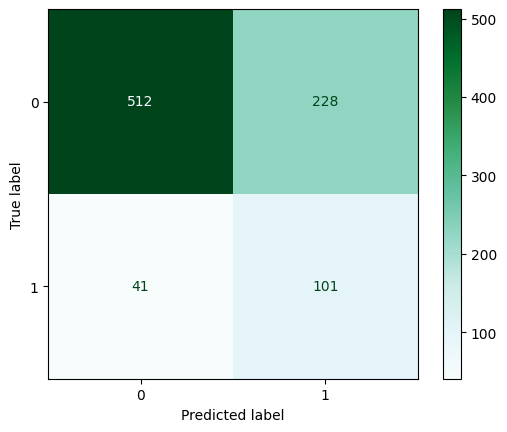

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.BuGn)
plt.show()

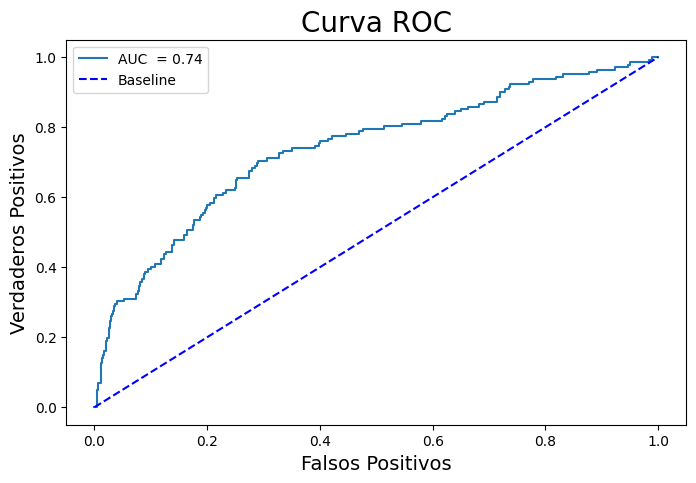

In [ ]:
# Curva ROC y área bajo la curva
probs = clf.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

### Hist Gradient Boosting

Algoritmo de clasificación que utiliza una técnica de *boosting* para construir un conjunto de árboles de decisión. A diferencia de Random Forest, otro de los algoritmos avanzados que se podría haber usado y cuyos árboles se construyen de forma independiente y paralela, Hist Gradient Boosting utiliza un proceso iterativo en el que se construye un árbol a la vez y se ajustan los pesos de las observaciones para darle mayor importancia a las que se clasificaron incorrectamente en el árbol anterior.  Utiliza un histograma para hacer una aproximación de los valores de las variables continuas en lugar de una partición exacta de los valores. Esta aproximación reduce el costo computacional y mejora la eficiencia del algoritmo.

#### Omisión

In [ ]:
# Creamos el modelo
hist_gb = HistGradientBoostingClassifier(class_weight='balanced', random_state = 23)
# Pipeline del preprocesador y del clasificador de Random Forest
pipe_scale_hist_gb = Pipeline(steps=[('preprocessor', preprocessor),('hist_gb', hist_gb)])

In [ ]:
# Validación cruzada de cada uno de los pliegues y medición del error
scores = cross_val_score(pipe_scale_hist_gb, X_train, y_train, scoring='balanced_accuracy', cv = 5)

print(f"Las medidas son: {scores}")
print(f"Y la media del error de validación cruzada es: {scores.mean():.2f} +- {scores.std():.2f}")

Las medidas son: [0.80243895 0.79889758 0.79467461 0.79746921 0.79595244]
Y la media del error de validación cruzada es: 0.80 +- 0.00


#### Ajuste de hiperparámetros

In [ ]:
param_dist = {'hist_gb__learning_rate': [0.05, 0.1, 0.2, 0.3],
              'hist_gb__max_iter': [100, 200, 300, 400],
              'hist_gb__max_depth': [3, 5, 7, 9]}


rs_hist_gb = RandomizedSearchCV(pipe_scale_hist_gb,
                                   param_distributions=param_dist,
                                   n_iter=100, cv= 5, scoring='balanced_accuracy')
pipe_scale_hist_gb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'P...
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['BusinessTravel'], dtype='object'))])),
                ('hist_gb',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                random_state=23))])

In [ ]:
rs_hist_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'Mont...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ordinal',
                                                                                                OrdinalEncoder())]),
                                                                               Index(['BusinessTravel'], dtype='object'))])),
                                             ('hist_gb',
                                              HistGradientBoostingClassifier(class_weight='balanced',
                                                                             random_state=23))]),
                   n_iter=100,
                   param_distributions={'hist_gb__learning_rate': [0.05, 0.1,
                                                                   0.2, 0.3],
                                        'hist_gb__max_depth': [3, 5, 7, 9],
                                        'hist_gb__max_iter': [100, 200, 300,
                                                              400]},
                   scoring='balanced_accuracy')

In [ ]:
rs_hist_gb.best_params_, rs_hist_gb.best_score_

({'hist_gb__max_iter': 400,
  'hist_gb__max_depth': 7,
  'hist_gb__learning_rate': 0.3},
 0.8196376733606258)

Medición de la calidad del modelo con más herramientas

In [ ]:
# Mejores resultados
resultados = pd.DataFrame(rs_hist_gb.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_hist_gb__max_iter,param_hist_gb__max_depth,param_hist_gb__learning_rate,mean_test_score,std_test_score
59,400,7,0.3,0.819638,0.010127
55,400,5,0.3,0.818117,0.022081
45,200,9,0.2,0.814639,0.016565
23,400,5,0.1,0.813459,0.013075
39,400,5,0.2,0.812878,0.011412


In [ ]:
# Classification report
y_pred = rs_hist_gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       740
           1       0.94      0.64      0.76       142

    accuracy                           0.94       882
   macro avg       0.94      0.82      0.86       882
weighted avg       0.94      0.94      0.93       882



In [ ]:
# Balanced accuracy
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}")

El valor de balanced accuracy: 0.8163684811572136


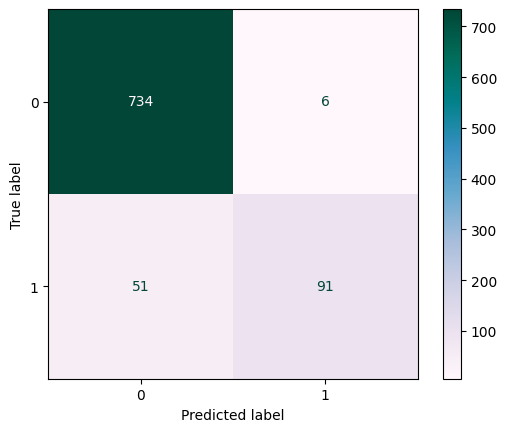

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rs_hist_gb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rs_hist_gb.classes_)
disp.plot(cmap=plt.cm.PuBuGn)
plt.show()

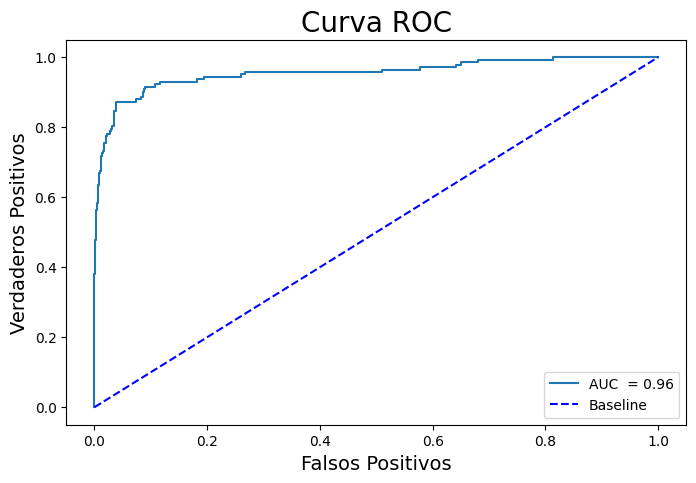

In [ ]:
# Curva ROC y área bajo la curva
probs = rs_hist_gb.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

### XGBoost

Como implementación adicional, vamos a comprobar el rendimiento de XGBoost, que es un algoritmo que utiliza un conjunto de árboles de decisión entrenados secuencialmente en un proceso iterativo para mejorar la precisión de las predicciones en problemas de clasificación y regresión.

#### Omisión

In [ ]:
xgb = XGBClassifier(random_state = 23) #No tiene parámetro class_weight
pipe_scale_xgb = Pipeline(steps=[('preprocessor', preprocessor),('xgb', xgb)])

In [ ]:
# Validación cruzada de cada uno de los pliegues y medición del error
scores = cross_val_score(pipe_scale_xgb, X_train, y_train, scoring='balanced_accuracy', cv = 5)

print(f"Las medidas son: {scores}")
print(f"Y la media del error de validación cruzada es: {scores.mean():.2f} +- {scores.std():.2f}")

Las medidas son: [0.75640114 0.75302276 0.74678461 0.76589034 0.72938374]
Y la media del error de validación cruzada es: 0.75 +- 0.01


#### Ajuste de hiperparámetros

In [ ]:
param_dist = {
    'xgb__n_estimators': range(50, 1001, 50),
    'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'xgb__max_depth': [2, 3, 4, 5, 6],
    'xgb__min_child_weight': [1, 2, 3, 4, 5],
    'xgb__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__gamma': [0, 1, 2, 3, 4, 5],
    'xgb__reg_alpha': [0, 0.1, 0.5, 1, 2, 5, 10],
    'xgb__reg_lambda': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
}

'''
Explicación detallada:
- n_estimators: número de árboles en el modelo de XGBoost.
- learning_rate: tasa de aprendizaje utilizada en el modelo.
- max_depth: profundidad máxima del árbol.
- min_child_weight: peso mínimo necesario para dividir un nodo.
- subsample: fracción de instancias de entrenamiento a utilizar en cada árbol.
- colsample_bytree: fracción de características a utilizar en cada árbol.
- gamma: valor mínimo de reducción de la pérdida necesaria para dividir un nodo.
- reg_alpha: parámetro de regularización L1.
- reg_lambda: parámetro de regularización L2.
'''

rs_xgb = RandomizedSearchCV(pipe_scale_xgb,
                          param_distributions=param_dist,
                          n_iter=100, cv= 5, scoring='balanced_accuracy')

pipe_scale_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'P...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=23, ...))])

In [ ]:
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'Mont...
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.6, 0.7,
                                                                  0.8, 0.9,
                                                                  1.0],
                                        'xgb__gamma': [0, 1, 2, 3, 4, 5],
                                        'xgb__learning_rate': [0.001, 0.01, 0.1,
                                                               0.2, 0.3],
                                        'xgb__max_depth': [2, 3, 4, 5, 6],
                                        'xgb__min_child_weight': [1, 2, 3, 4,
                                                                  5],
                                        'xgb__n_estimators': range(50, 1001, 50),
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1, 2, 5,
                                                           10],
                                        'xgb__reg_lambda': [0.001, 0.01, 0.1,
                                                            0.5, 1, 5, 10],
                                        'xgb__subsample': [0.5, 0.6, 0.7, 0.8,
                                                           0.9, 1.0]},
                   scoring='balanced_accuracy')

In [ ]:
rs_xgb.best_params_, rs_xgb.best_score_

({'xgb__subsample': 0.7,
  'xgb__reg_lambda': 0.1,
  'xgb__reg_alpha': 0,
  'xgb__n_estimators': 600,
  'xgb__min_child_weight': 1,
  'xgb__max_depth': 6,
  'xgb__learning_rate': 0.3,
  'xgb__gamma': 0,
  'xgb__colsample_bytree': 0.8},
 0.771065650512757)

Medición de la calidad del modelo con más herramientas

In [ ]:
# Mejores resultados
resultados = pd.DataFrame(rs_xgb.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_xgb__subsample,param_xgb__reg_lambda,param_xgb__reg_alpha,param_xgb__n_estimators,param_xgb__min_child_weight,param_xgb__max_depth,param_xgb__learning_rate,param_xgb__gamma,param_xgb__colsample_bytree,mean_test_score,std_test_score
85,0.7,0.1,0,600,1,6,0.3,0,0.8,0.771066,0.017972
95,0.8,1,0,850,5,5,0.2,0,0.9,0.766005,0.023704
83,0.8,0.1,2,850,3,5,0.3,0,0.5,0.746226,0.020027
2,0.6,1,0.1,150,3,6,0.2,1,1.0,0.743522,0.006226
53,0.5,0.1,5,900,1,5,0.3,0,0.9,0.739499,0.010551


In [ ]:
# Classification report
y_pred = rs_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       740
           1       0.89      0.54      0.67       142

    accuracy                           0.91       882
   macro avg       0.91      0.76      0.81       882
weighted avg       0.91      0.91      0.91       882



In [ ]:
# Balanced accuracy
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}")

El valor de balanced accuracy: 0.7615245527217358


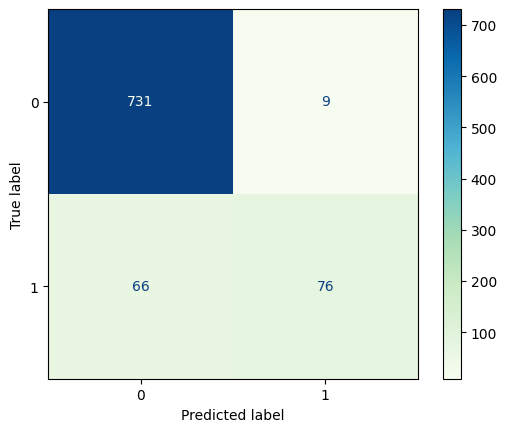

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rs_xgb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rs_xgb.classes_)
disp.plot(cmap=plt.cm.GnBu)
plt.show()

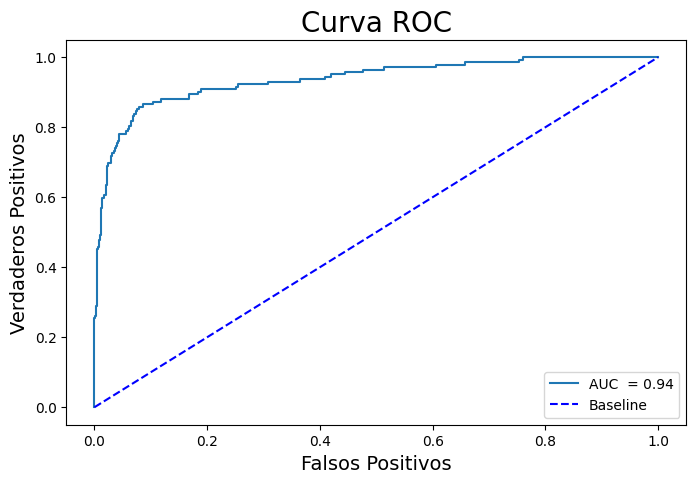

In [ ]:
# Curva ROC y área bajo la curva
probs = rs_xgb.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

## Mejor modelo

Nuestro mejor modelo es Hist Gradient Boosting. Ambos modelos avanzados superan con facilidad al modelo básico de Regresión Logística, pero entre ellos, Hist Gradient Boosting tiene una mayor precisión que XGBoost (el balanced_accuracy es mayor en el primero: 0,816 > 0,761). Incluso el modelo de Hist Gradient Boosting por omisión predice mejor que el ajuste de XGBoost.

In [ ]:
# Los hiperparámetors del mejor modelo son
rs_hist_gb.best_params_

{'hist_gb__max_iter': 400,
 'hist_gb__max_depth': 7,
 'hist_gb__learning_rate': 0.3}

Ahora vamos a comprobrar si, al hacer una selección de características, nuestro mejor modelo mejora los resultados del apartado anterior.

## Selección de características

La selección de características se refiere a la selección de un subconjunto de variables relevantes para el modelo. Es el proceso de elegir una parte de las características que proporcionen una mayor precisión de predicción y reduzcan la complejidad del modelo.

Es una metodología importante porque puede mejorar la precisión de la predicción del modelo al eliminar características irrelevantes, ya que no todas las variables aportan información útil. En este sentido, sirve para identificar las características más importantes que afectan a la variable objetivo. En general, es un proceso que puede mejorar el rendimiento del modelo debido a la reducción de tiempo y recursos necesarios para entrenarlo y obtener las predicciones.

Pero, por otro lado, este proceso de selección puede acarrear otros aspectos más negativos, como la périda de información valiosa por la eliminación de características, o la dificultad para determinar cuáles son las variables más relevantes para el modelo y de cuáles se puede prescindir, sobre todo si existen relaciones complejas entre las variables. Además, puede ser un proceso computacionalmente costoso cuanto mayor es la cantidad de información a evaluar.

En nuestro caso, hemos escogido el método *F-Classification*, que es una de las técnicas que utiliza un análisis estadístico para evaluar la relación entre una variable dependiente y una o más variables independientes. En esta práctica, se utiliza para evaluar la importancia de cada característica en un conjunto de datos. Las variables con una puntuación F alta se consideran más importantes, lo que indica que tienen una mayor relación con la variable objetivo. Estas características pueden ser seleccionadas para su inclusión en un modelo de aprendizaje automático y las características menos importantes pueden ser eliminadas para simplificar el modelo y mejorar su rendimiento.

En primer lugar, para hacer la selección de características, debemos escoger el número de variables que queremos incluir en el nuevo modelo (umbral). A continuación, preprocesamos los datos de entrada (X) utilizando el preprocesador definido previamente, y utilizamos la función f_classif para calcular la puntuación F y el valor p para cada característica en los datos preprocesados y la variable objetivo y. Por último, ordenamos esas puntuaciones en orden descendente y escogemos las características con las mayores que se encuentren dentro del umbral.

In [ ]:
# Código
threshold = 20
high_score_features = []

X_preprocessed = preprocessor.fit_transform(X)

feature_scores = f_classif(X_preprocessed, y)[0]

for score, f_name in sorted(zip(feature_scores, X.columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_features.append(f_name)
df_fc = X[high_score_features]
print(df_fc.columns)

print(feature_scores)
print(df_fc)
print(high_score_features)
#print(X_preprocessed)

X_train2,X_test2,y_train,y_test = train_test_split(df_fc,y,test_size=0.2, random_state=23)

hrs 143.13868595064497
JobRole 117.17589141718466
PercentSalaryHike 106.93371227761926
Age 106.92750093209143
MonthlyIncome 77.43490073965016
TrainingTimesLastYear 60.085512174091065
EnvironmentSatisfaction 39.7520891911105
JobSatisfaction 31.276783968091234
WorkLifeBalance 17.218345165575723
absences 9.99357548324819
NumCompaniesWorked 7.371171129996437
MaritalStatus 7.210182354679598
YearsSinceLastPromotion 6.148098359994043
TotalWorkingYears 5.174413552062357
StockOptionLevel 4.648171311675694
YearsAtCompany 3.9224259072206267
EducationField 3.4468456774017864
Gender 3.2945859730968503
Education 2.6247350076303446
PerformanceRating 2.6050986205297098
Index(['hrs', 'JobRole', 'PercentSalaryHike', 'Age', 'MonthlyIncome',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'absences', 'NumCompaniesWorked', 'MaritalStatus',
       'YearsSinceLastPromotion', 'TotalWorkingYears', 'StockOptionLevel',
       'YearsAtCompany', 'EducationFie

In [ ]:
# Codificación de la salida otra vez (si no lo hacemos sale un error)
le = preprocessing.LabelEncoder()
le.fit(y)

#Transformamos las variables categóricas de la salida en numéricas
y_test = le.transform(y_test)
y_train = le.transform (y_train)

print(le.classes_) # 0 = No; 1 = Yes

['No' 'Yes']


Ahora se repite todo el preprocesamiento de antes para las variables seleccionadas. Ahora ya no contamos con la variable BusinessTravel, la categórica ordinal, por lo que vamos a dividir el *Pipeline* del preprocesador en dos columnas sólo: una para las categóricas y otra para las numéricas.

In [ ]:
# Separamos las variables categóricas y numéricas para el preprocesamiento
cat_cols = X_train2.select_dtypes(include="object").columns
num_cols = X_train2.select_dtypes(exclude="object").columns
# Ya no está BusinessTravel

In [ ]:
cat_cols

Index(['JobRole', 'MaritalStatus', 'EducationField', 'Gender'], dtype='object')

In [ ]:
num_cols

Index(['hrs', 'PercentSalaryHike', 'Age', 'MonthlyIncome',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'absences', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'TotalWorkingYears', 'StockOptionLevel',
       'YearsAtCompany', 'Education', 'PerformanceRating'],
      dtype='object')

En el preprocesamiento para las variables categóricas, al haber solamente 4, no incluimos el PCA porque, como hemos visto en el EDA, las variables no están muy correlacionadas, por lo que no habría mucha información que agrupar y la reducción de la dimensionalidad no sería muy efectiva

In [ ]:
# Pipeline para variables categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

In [ ]:
# Pipeline para variables numéricas
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

In [ ]:
preprocesator = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
    ])

In [ ]:
preprocesator

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['hrs', 'PercentSalaryHike', 'Age', 'MonthlyIncome',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'absences', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'TotalWorkingYears', 'StockOptionLevel',
       'YearsAtCompany', 'Education', 'PerformanceRating'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['JobRole', 'MaritalStatus', 'EducationField', 'Gender'], dtype='object'))])

In [ ]:
# Creamos el modelo
hist_gb_selec = HistGradientBoostingClassifier(class_weight='balanced', random_state = 23)
# Pipeline del preprocesador y del clasificador de Hist Gradient Boosting
pipe_scale_hist_gb_selec = Pipeline(steps=[('preprocesator', preprocesator),('hist_gb_selec', hist_gb_selec)])

In [ ]:
param_dist = {'hist_gb_selec__learning_rate': [0.05, 0.1, 0.2, 0.3],
              'hist_gb_selec__max_iter': [100, 200, 300, 400],
              'hist_gb_selec__max_depth': [3, 5, 7, 9]}


rs_hist_gb_selec = RandomizedSearchCV(pipe_scale_hist_gb_selec,
                                   param_distributions=param_dist,
                                   n_iter=100, cv= 5, scoring='balanced_accuracy')
pipe_scale_hist_gb_selec

Pipeline(steps=[('preprocesator',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['hrs', 'PercentSalaryHike', 'Age', 'MonthlyIncome',
       'TrainingTimesLastYear', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'absences', 'NumCompaniesWorked',
       'YearsSinceLastPromotion', 'TotalWork...
       'YearsAtCompany', 'Education', 'PerformanceRating'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['JobRole', 'MaritalStatus', 'EducationField', 'Gender'], dtype='object'))])),
                ('hist_gb_selec',
                 HistGradientBoostingClassifier(class_weight='balanced',
                                                random_state=23))])

In [ ]:
modelo_selec = rs_hist_gb_selec.fit(X=X_train2, y=y_train)

In [ ]:
#rs_hist_gb_selec.best_params_, rs_hist_gb_selec.best_score_
modelo_selec.best_params_, modelo_selec.best_score_

({'hist_gb_selec__max_iter': 300,
  'hist_gb_selec__max_depth': 9,
  'hist_gb_selec__learning_rate': 0.1},
 0.7990909779145074)

In [ ]:
y_test_pred = modelo_selec.predict(X_test2)
result = metrics.classification_report(y_test, y_test_pred)
print("Classification Report with filtered features:",)
print(result)

Classification Report with filtered features:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       724
           1       0.90      0.72      0.80       158

    accuracy                           0.94       882
   macro avg       0.92      0.85      0.88       882
weighted avg       0.93      0.94      0.93       882



In [ ]:
# Balanced accuracy
print(f"El valor de balanced accuracy: {balanced_accuracy_score(y_test, y_test_pred)}")

El valor de balanced accuracy: 0.8517815931183998


Un apunte bastante importante que nos gustaría hacer aquí es que, como se puede ver, el rendimiento en la validación cruzada tiene, como mejor pliegue, un error de 0,79, mientras que, después de hacer la predicción, sale 0,85. Esto se debe a que la validación cruzada puede dar una estimación del rendimiento del modelo en datos no vistos, pero no puede garantizar que el rendimiento sea el mismo en un conjunto de prueba independiente. Una vez que se ha encontrado el mejor modelo, se puede entrenar con los datos completos y evaluar su rendimiento en un conjunto de prueba distinto (escribimos aquí este comentario porque es el caso en que más claro se ve de todos los algoritmos ejecutados).

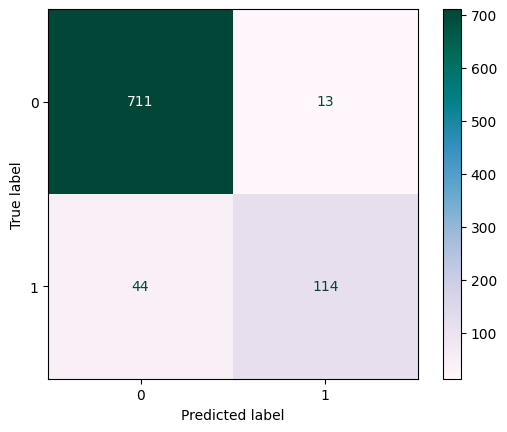

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=modelo_selec.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_selec.classes_)
disp.plot(cmap=plt.cm.PuBuGn)
plt.show()

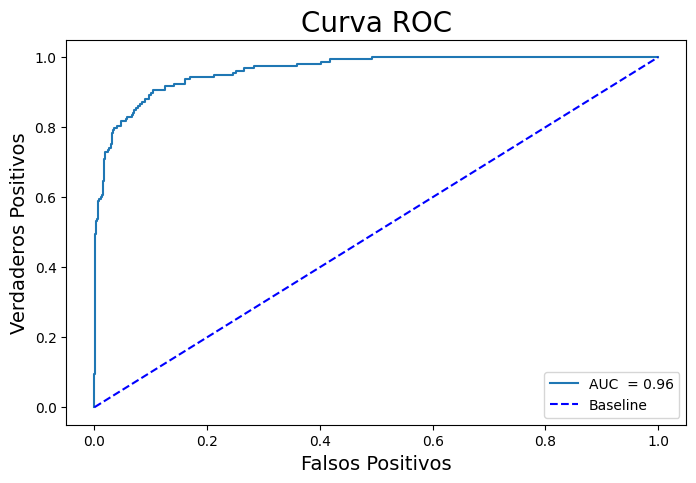

In [ ]:
# Curva ROC y área bajo la curva
probs = modelo_selec.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

## Decisión final

Una vez hecho nuestro estudio, vamos a escoger el modelo de Hist Gradient Boosting después del filtrado. Como se ha podido observar, el rendimiento del modelo antes y después del filtrado es similar (balanced_accuracy de 0,816 y 0,85, respectivamente). Hay que tener en cuenta que en el filtrado hemos seleccionado 20 de las 26 variables que contenía el fichero, aunque, en realidad, también habría que tener en cuenta las 4 variables iniciales que hemos eliminado en el EDA, es decir, en total hemos conseguido suprimir 10 variables y obtener una mejor calidad del modelo.

Pensamos que esas 10 variables, por tanto, no aportaban gran información al modelo y este ha sido capaz de generalizar correctamente. Podemos decir que la eliminación de esas variables reduce la complejidad del modelo, lo que hace que sea más fácil de interpretar y de implementar. También disminuye el coste computacional del entrenamiento y la inferencia del modelo, ya que hay menos variables que considerar.

Cabe destacar que también hemos hecho otras pruebas con otras cantidades de variables (threshold). Por otro lado, utilizábamos 20 iteraciones sólo cada vez que hacíamos una prueba nueva, principalmente por la cantidad de tiempo necesaria para obtener los resultados si incrementábamos ese número.

Otro apunte importante es que nos ha sorprendido que el modelo mejorase ya que, como hemos comentado en clase, esperábamos que el rendimiento empeorase ligeramente. De hecho, en un principio fue así, pero después de probar distintos umbrales conseguimos un mayor rendimiento. Pensábamos que, al eliminar variables, el modelo tendría una menor calidad, independientemente de que fuesen las menos significativas. Sin embargo, como se ha podido ver, el modelo responde incluso mejor pese a la eliminación de variables.

# Modelo final (fichero PKL)

Por último, y de cara a la entrega, guardamos el mejor modelo entrenado en un fichero PKL.

In [ ]:
# Guardar el fichero en pkl

filename = 'modelo_final.pkl'
with open(filename, 'wb') as file:
  pickle.dump(modelo_selec, file)


# Conclusiones del Notebook

Algunos comentarios generales que resumen nuestro trabajo y que podemos sacar de este Notebook son:

- El EDA es una fase importante en el proceso de modelado de datos, ya que permite comprender mejor los datos. En esta ocasión, nos ha servido para luego hacer el preprocesamiento de los datos nulos.

- Los pipelines son útiles porque nos permiten preprocesar los datos y entrenar un modelo de manera eficiente en una sola línea de código. Estéticamente son más elegantes porque puede incluir el preprocesamiento y el modelo.

- La regresión logística es un modelo más simple y más rápido de entrenar y ajustar que los modelos de *boosting*, mientras que los métodos avanzados superan su rendimiento, entre otros motivos, porque pueden manejar mejor los datos desequilibrados y las independencias entre variables.

- La selección de características es una técnica utilizada para reducir el número de atributos en un conjunto de datos, lo que puede mejorar la calidad del modelo y reducir el tiempo de entrenamiento.

En conclusión, la práctica nos ha servido para poner en práctica lo que hemos visto en clase. Al ser la segunda, ha sido más intuitiva y más fácil de seguir porque ya contábamos con la experiencia de la primera. No obstante, creemos que el Aprendizaje Automático es un campo muy amplio y con muchas ramas que se podrían explorar, y que esta práctica es una pequeña parte de lo que se podría llegar a hacer.  